In [20]:
import os
import pandas as pd
from datetime import datetime


def get_file_metadata(path):
    created = datetime.fromtimestamp(os.path.getctime(path))
    modified = datetime.fromtimestamp(os.path.getmtime(path))
    return created, modified

def process_csv_files(folder_path):
    data = []
    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            if file_name.endswith('.wav'):
                file_path = os.path.join(root, file_name)
                created, modified = get_file_metadata(file_path)
                folder_name = os.path.basename(root)
                
                data.append({
                    'Folder': root,
                    'File': file_name,
                    'Created': created,
                    'Modified': modified
                })

    df = pd.DataFrame(data)
    return df



In [21]:
# Usage example
folder_path = 'D:\\Github\\Text-to-MP4'
metadata_df = process_csv_files(folder_path)
print(metadata_df)

                                                 Folder     File  \
0     D:\Github\Text-to-MP4\Output\Chilord - Wind Sh...    0.wav   
1     D:\Github\Text-to-MP4\Output\Chilord - Wind Sh...    1.wav   
2     D:\Github\Text-to-MP4\Output\Chilord - Wind Sh...   10.wav   
3     D:\Github\Text-to-MP4\Output\Chilord - Wind Sh...  100.wav   
4     D:\Github\Text-to-MP4\Output\Chilord - Wind Sh...  101.wav   
...                                                 ...      ...   
2778  D:\Github\Text-to-MP4\Output\Chilord - Wind Sh...   89.wav   
2779  D:\Github\Text-to-MP4\Output\Chilord - Wind Sh...    9.wav   
2780  D:\Github\Text-to-MP4\Output\Chilord - Wind Sh...   90.wav   
2781  D:\Github\Text-to-MP4\Output\Chilord - Wind Sh...   91.wav   
2782  D:\Github\Text-to-MP4\Output\Chilord - Wind Sh...   92.wav   

                        Created                   Modified  
0    2023-06-22 23:22:22.053463 2023-06-22 23:22:22.058464  
1    2023-06-22 23:23:11.634438 2023-06-22 23:23:11.637950  


In [25]:
csv_file_path = 'metadata.csv'
metadata_df.to_csv(csv_file_path, index=False)

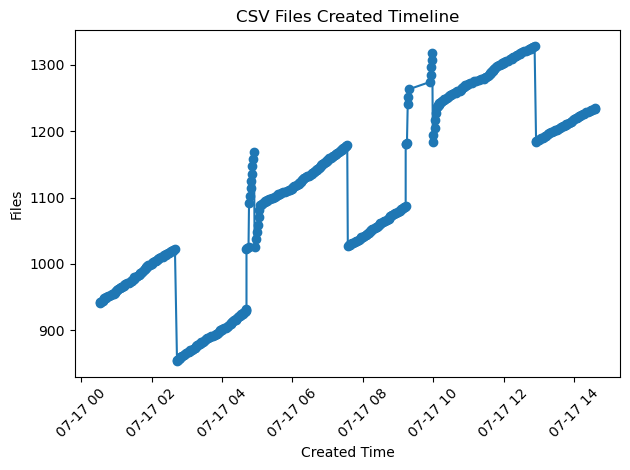

In [23]:
import matplotlib.pyplot as plt
# Sort DataFrame by 'Created' column
metadata_df = metadata_df.sort_values('Created')

filter_date = datetime(2023, 7, 16)
filtered_df = metadata_df[metadata_df['Created'] > filter_date]

# Sort filtered DataFrame by 'Created' column
filtered_df = filtered_df.sort_values('Created')
# Create the timeline graph
plt.plot(filtered_df['Created'], filtered_df.index, marker='o')
plt.xlabel('Created Time')
plt.ylabel('Files')
plt.title('CSV Files Created Timeline')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the graph
plt.show()